data: https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature_names = pd.read_csv(r'C:\human_activity\UCI HAR Dataset\human_activity\features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

In [2]:
display(feature_names.head())

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [3]:
display(feature_names['column_name'].value_counts())

fBodyAccJerk-bandsEnergy()-41,48    3
fBodyAcc-bandsEnergy()-57,64        3
fBodyAcc-bandsEnergy()-41,48        3
fBodyAcc-bandsEnergy()-33,40        3
fBodyAcc-bandsEnergy()-25,32        3
                                   ..
tBodyGyro-arCoeff()-Z,3             1
tBodyGyro-arCoeff()-Z,2             1
tBodyGyro-arCoeff()-Z,1             1
tBodyGyro-arCoeff()-Y,4             1
angle(Z,gravityMean)                1
Name: column_name, Length: 477, dtype: int64

In [4]:
feature_dup_df = feature_names.groupby(by='column_name').count()
display(feature_dup_df[feature_dup_df['column_index'] > 1].count())

column_index    42
dtype: int64

In [5]:
display(feature_dup_df[feature_dup_df['column_index'] > 1].head())

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [6]:
def get_new_feature_names(old_df):
    feature_dup_df = pd.DataFrame(data=old_df.groupby(by='column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_names = pd.merge(old_df.reset_index(), feature_dup_df, how='outer')
    new_feature_names['column_name'] = new_feature_names[['column_name', 'dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1] if x[1]>0 else x[0]), axis=1)
    new_feature_names = new_feature_names.drop('index', axis=1)
    return new_feature_names

In [7]:
new_feature_names = get_new_feature_names(feature_names)

In [8]:
new_feature_names['column_name'].value_counts(ascending=False).max()

1

In [9]:
display(new_feature_names.head(10))

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X_tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y_tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z_tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X_tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y_tBodyAcc-std()-Y,0
5,6,tBodyAcc-std()-Z_tBodyAcc-std()-Z,0
6,7,tBodyAcc-mad()-X_tBodyAcc-mad()-X,0
7,8,tBodyAcc-mad()-Y_tBodyAcc-mad()-Y,0
8,9,tBodyAcc-mad()-Z_tBodyAcc-mad()-Z,0
9,10,tBodyAcc-max()-X_tBodyAcc-max()-X,0


In [10]:
features = new_feature_names['column_name'].values.tolist()

In [11]:
x_train = pd.read_csv(r'C:\human_activity\UCI HAR Dataset\human_activity\train\X_train.txt', sep='\s+', names=features)
y_train = pd.read_csv(r'C:\human_activity\UCI HAR Dataset\human_activity\train\y_train.txt', sep='\s+', names=['action'])

x_test = pd.read_csv(r'C:\human_activity\test\X_test.txt', sep='\s+', names=features)
y_test = pd.read_csv(r'C:\human_activity\UCI HAR Dataset\human_activity\test\y_test.txt', sep='\s+', names=['action'])

In [12]:
display(x_train.info())
display(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X_tBodyAcc-mean()-X to angle(Z,gravityMean)_angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, tBodyAcc-mean()-X_tBodyAcc-mean()-X to angle(Z,gravityMean)_angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.6 MB


None

In [13]:
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(7352, 561)

(2947, 561)

(7352, 1)

(2947, 1)

In [14]:
display(x_train.head())

,tBodyAcc-mean()-X_tBodyAcc-mean()-X,tBodyAcc-mean()-Y_tBodyAcc-mean()-Y,tBodyAcc-mean()-Z_tBodyAcc-mean()-Z,tBodyAcc-std()-X_tBodyAcc-std()-X,tBodyAcc-std()-Y_tBodyAcc-std()-Y,tBodyAcc-std()-Z_tBodyAcc-std()-Z,tBodyAcc-mad()-X_tBodyAcc-mad()-X,tBodyAcc-mad()-Y_tBodyAcc-mad()-Y,tBodyAcc-mad()-Z_tBodyAcc-mad()-Z,tBodyAcc-max()-X_tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq()_fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness()_fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis()_fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)_angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)_angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)_angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)_angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)_angle(X,gravityMean)","angle(Y,gravityMean)_angle(Y,gravityMean)","angle(Z,gravityMean)_angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [15]:
display(y_train.head())

,action
0,5
1,5
2,5
3,5
4,5


In [16]:
display(x_train.value_counts())
display(y_train.value_counts())

tBodyAcc-mean()-X_tBodyAcc-mean()-X  tBodyAcc-mean()-Y_tBodyAcc-mean()-Y  tBodyAcc-mean()-Z_tBodyAcc-mean()-Z  tBodyAcc-std()-X_tBodyAcc-std()-X  tBodyAcc-std()-Y_tBodyAcc-std()-Y  tBodyAcc-std()-Z_tBodyAcc-std()-Z  tBodyAcc-mad()-X_tBodyAcc-mad()-X  tBodyAcc-mad()-Y_tBodyAcc-mad()-Y  tBodyAcc-mad()-Z_tBodyAcc-mad()-Z  tBodyAcc-max()-X_tBodyAcc-max()-X  tBodyAcc-max()-Y_tBodyAcc-max()-Y  tBodyAcc-max()-Z_tBodyAcc-max()-Z  tBodyAcc-min()-X_tBodyAcc-min()-X  tBodyAcc-min()-Y_tBodyAcc-min()-Y  tBodyAcc-min()-Z_tBodyAcc-min()-Z  tBodyAcc-sma()_tBodyAcc-sma()  tBodyAcc-energy()-X_tBodyAcc-energy()-X  tBodyAcc-energy()-Y_tBodyAcc-energy()-Y  tBodyAcc-energy()-Z_tBodyAcc-energy()-Z  tBodyAcc-iqr()-X_tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y_tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z_tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X_tBodyAcc-entropy()-X  tBodyAcc-entropy()-Y_tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z_tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1_tBodyAcc-arCoeff()-X,1  tBodyAcc-arCoeff()-X,2_tBodyAcc-ar

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
score = accuracy_score(y_test, pred)
print('Accuracy of DecisionTreeClassifier: {0:.4f}'.format(score))

Accuracy of DecisionTreeClassifier: 0.8548


In [18]:
print('basic parameters of DecisionTreeClassifier: {0}'.format(dt_clf.get_params()))

basic parameters of DecisionTreeClassifier: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [19]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6, 8, 10, 12], 'min_samples_split': [16]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(x_train, y_train)
print('best accuracy score: {0:.4f}'.format(grid_cv.best_score_))
print('best parameters: {0}'.format(grid_cv.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
best accuracy score: 0.8549
best parameters: {'max_depth': 8, 'min_samples_split': 16}


In [20]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
display(cv_results_df[['params', 'mean_test_score']])

,params,mean_test_score
0,"{'max_depth': 6, 'min_samples_split': 16}",0.847662
1,"{'max_depth': 8, 'min_samples_split': 16}",0.854879
2,"{'max_depth': 10, 'min_samples_split': 16}",0.852705
3,"{'max_depth': 12, 'min_samples_split': 16}",0.845768


In [45]:
import seaborn as sns

feature_importances = grid_cv.best_estimator_.feature_importances_
feature_importances_df = pd.DataFrame(feature_importances, index=x_train.columns, columns=['figure'])

In [46]:
display(feature_importances_df)

,figure
tBodyAcc-mean()-X_tBodyAcc-mean()-X,0.000000
tBodyAcc-mean()-Y_tBodyAcc-mean()-Y,0.000000
tBodyAcc-mean()-Z_tBodyAcc-mean()-Z,0.000000
tBodyAcc-std()-X_tBodyAcc-std()-X,0.000000
tBodyAcc-std()-Y_tBodyAcc-std()-Y,0.001752
...,...
"angle(tBodyGyroMean,gravityMean)_angle(tBodyGyroMean,gravityMean)",0.001291
"angle(tBodyGyroJerkMean,gravityMean)_angle(tBodyGyroJerkMean,gravityMean)",0.000000
"angle(X,gravityMean)_angle(X,gravityMean)",0.000989
"angle(Y,gravityMean)_angle(Y,gravityMean)",0.139001


In [47]:
top20 = feature_importances_df.sort_values(by='figure', ascending=False)[:20]

In [48]:
display(top20)

,figure
tGravityAcc-min()-X_tGravityAcc-min()-X,0.253354
"fBodyAccJerk-bandsEnergy()-1,16_fBodyAccJerk-bandsEnergy()-1,16",0.212584
"angle(Y,gravityMean)_angle(Y,gravityMean)",0.139001
fBodyAccMag-energy()_fBodyAccMag-energy(),0.115478
"tGravityAcc-arCoeff()-Z,2_tGravityAcc-arCoeff()-Z,2",0.101885
fBodyGyro-maxInds-X_fBodyGyro-maxInds-X,0.023971
tGravityAcc-energy()-Y_tGravityAcc-energy()-Y,0.020470
"tBodyGyro-correlation()-Y,Z_tBodyGyro-correlation()-Y,Z",0.016513
tGravityAccMag-arCoeff()1_tGravityAccMag-arCoeff()1,0.015741
"tBodyAcc-correlation()-X,Y_tBodyAcc-correlation()-X,Y",0.009972


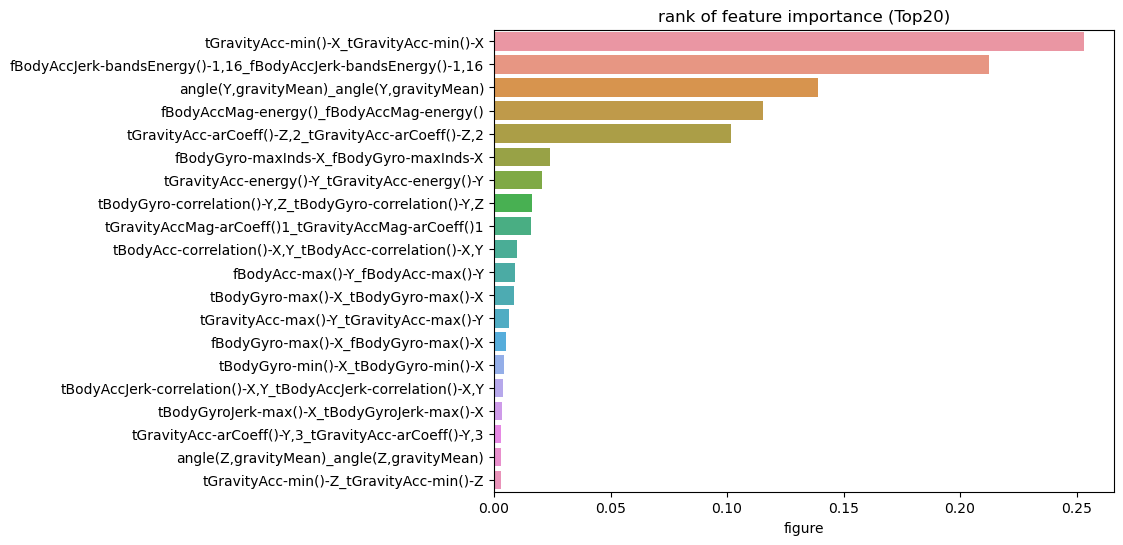

In [49]:
plt.figure(figsize=(8, 6))
plt.title('rank of feature importance (Top20)')
sns.barplot(x=top20.figure, y=top20.index)
plt.show()